In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy.signal
%config InlineBackend.figure_format='retina'

import sys
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt

In [2]:
DATA_DIR = "/project/rrg-mdiamond/tomren/mudata/MP0100/DT5550W/"

ftime_min=ftime_max=None


In [3]:
# Slope scan:
labels = [1,2,3,4,5,6,8]
data_inds = np.arange(166,173)
bins=np.linspace(0,25,240)
ch="0"
normed=False

# Load all data
Data = []
for i, idata in enumerate(data_inds):
    filename = f"{DATA_DIR}/{idata}.data"
    data  = hpt.load_finetime(filename, chs =["16","17"])
    Data.append(data)
    

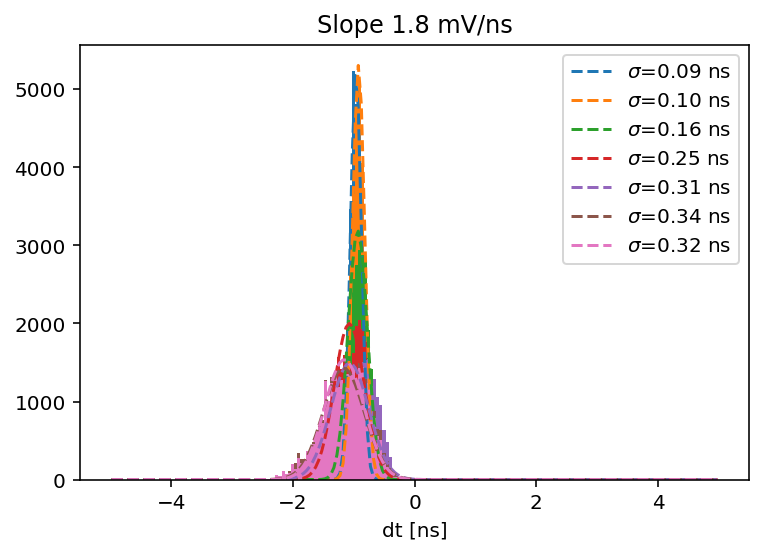

In [6]:
for i, idata in enumerate(data_inds[:]):
    data  = Data[i]

    mask_hit16 = (data["HIT_16"]==1)
    mask_hit17 = (data["HIT_17"]==1)
    mask_coinc = mask_hit16&mask_hit17

    dt_coinc = (data.TIMESTAMP_16-data.TIMESTAMP_17)
    h=hist(dt_coinc[mask_coinc], bins=np.linspace(-5,5,200));
    popt, pcov, info, f = hp.fit_hist("gauss", h, label="$\sigma$={popt[2]:.2f} ns", color=f"C{i}", linestyle="--");
legend()
xlabel("dt [ns]")    
title(f"Slope {20/labels[i]/1.414:.1f} mV/ns")
show()